# Object Oriented Programming
- Object Oriented Programming
    - Defining your own class
    - Specify your own clases
    - Special method

In [3]:
x = [1, 5, 4] # 赋值的同时创建了对象x，此类型对应的method可以被应用到x上
x.sort()
x

[1, 4, 5]

In [5]:
x.__class__ # __class__属性中存了一些数据(data)

list

In [6]:
class consumer:
    pass # stand in for an empty code block

In [7]:
c1 = consumer()
c1.wealth = 10 # new attributes can be created on the fly
c1.wealth

10

In [2]:
class consumer:
    
    def __init__(self, w, name = 'anonymous'): # constructor method
        "Initialize consumer with w dallars of wealth"
        self.wealth = w
        self.name = name
        # whenever we create an instance of the calss
        # this method will be called automatically
    
    def earn(self, y): # Any method defined within the class should have self as its first argument
        self.wealth += y # Any method referenced within the class should be called as self.method_name
        
    def spend(self, x):
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficent funds")
        else:
            self.wealth = new_wealth

In [4]:
c1 = consumer(10)
consumer.earn(c1, 10) # The standard expression
c1.wealth

20

In [5]:
c1.earn(15)
c1.spend(100)

Insufficent funds


In [6]:
c1.__dict__ # 用于查看该对象中存储的数据

{'wealth': 35, 'name': 'anonymous'}

## The Solow Growth Model

In [8]:
import numpy as np
class Solow:
    r"""
    Implements the Solow growth model with update rule
    .. math::
    k_{t+1} = \frac{s z k^{\alpha}_t}{1 + n} + k_t \frac{1 - d}{1 + n}
    """
    def __init__(self, n, s, d, alpha, z, k):
        self.n, self.s, self.d, self.alpha, self.z = n, s, d, alpha, z
        self.k = k
        
    def h(self):
        "Evaluate the h function"
        temp = self.s * self.z * self.k**self.alpha + self.k * (1 - self.d)
        return temp / (1 + self.n)
    
    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k = self.h()
        
    def steady_state(self):
        "Compute the steady state value of capital."
        return ((self.s * self.z) / (self.n + self.d))**(1 / (1 - self.alpha))
    
    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

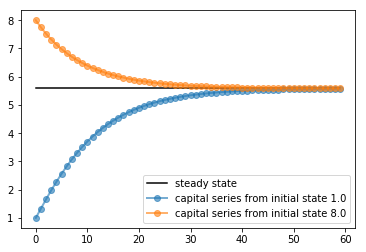

In [15]:
import matplotlib.pyplot as plt
baseline_params = 0.05, 0.25, 0.1, 0.3, 2.0, 1.0
s1 = Solow(*baseline_params) # The 'splat' operator * breaks up the tuple
s2 = Solow(*baseline_params)
s2.k = 8.0
T = 60
fig, ax = plt.subplots() ## TBD
# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')
# Plot time series for each economy
for s in s1, s2:
    lb = 'capital series from initial state {}'.format(s.k)
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)
    
ax.legend(loc='lower right')
plt.show()

## Special Methods
Python provides special methods with which some neat tricks can be performed.

In [41]:
class Foo:
    
    def __init__(self, u): # constructor method
        self.u = u
    
    def __len__(self):
        return 42
    
    def __call__(self, x):
        return 42 + x

In [44]:
f = Foo(11) # 在直接使用类名时的作用是创建对象

In [45]:
len(f) # 该函数可以作为对object的一种测度

42

In [52]:
f(1) # 对象是可以被直接调用的，但注意调用的是对象而不是类

43

### 如何理解__call__?

在Python中，任何东西都是一个对象。事实上当我们定义函数的时候执行的操作是自动创建一个可调用的对象。

In [60]:
def f(x):
    """
    Example
    """
    y = x**2
    return y

In [65]:
print(f.__doc__)


    Example
    


In [70]:
class consumer:
    
    def __init__(self, w, name = 'anonymous'): # constructor method
        "Initialize consumer with w dallars of wealth"
        self.wealth = w
        self.name = name
        # whenever we create an instance of the calss
        # this method will be called automatically
        
    def __call__(self, currency):
        if currency == 'yuan':
            return self.wealth
        elif currency == 'dollar':
            return self.wealth/7
        else:
            return 'currency not recorded'
    
    def earn(self, y): # Any method defined within the class should have self as its first argument
        self.wealth += y # Any method referenced within the class should be called as self.method_name
        
    def spend(self, x):
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficent funds")
        else:
            self.wealth = new_wealth

In [73]:
c1 = consumer(10)
c1.earn(10)
c1('dollar')

2.857142857142857

## 关于回调函数

In [49]:

def a(i):
    """"
    回调函数1
    """
    print("回调函数1")
    return i**2
 
def b(i):
    """
    回调函数2
    """
    print("回调函数2")
    return i*2
 
def res(i,f):
    """
        中间函数，也可以成为调用回调函数的函数
    """
    print(i,f(i))  #在这里暗转正常函数的调用方法调用
 
def main():
    """
        第三函数，也就是在回调函数和中间函数，起控制作用的函数
    """
    i = int(input("输入一个数字："))
    if i > 5:
        res(i,a)  #传入回调函数的名字作为参数
    else:
        res(i,b)
 
main()

输入一个数字：6
回调函数1
6 36


## Exercise
### Exercise 1

In [119]:
import numpy as np
from random import uniform
class ECDF:
    
    def __init__(self, obs):
        self.obs = np.array(obs) # 利用ndarray进行更快速的处理
    
    def __call__(self, x):
        self.obs.sort()
        k = self.obs.searchsorted(x)
        return k/len(self.obs)

In [121]:
class ECDF1:
    
    def __init__(self, observations):
        self.observations = observations
        
    def __call__(self, x):
        counter = 0.0
        for obs in self.observations:
            if obs <= x:
                counter += 1
        return counter / len(self.observations)

In [129]:
samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)
F1 = ECDF1(samples)

print(F(0.5))
print(F1(0.5))

F1.observations = [uniform(0, 1) for i in range(1000)]
F.obs = np.array(F1.observations)

print(F(0.5))
print(F1(0.5))

0.6
0.6
0.524
0.524


### Exercise 2

In [1]:
class Polynomial:
    
    def __init__(self, coef):
        self.coef = coef
        
    def __call__(self, x):
        return sum(a*x**i for i, a in enumerate(self.coef))
            
    def differentiate(self):
        for i in range(len(self.coef)):
            self.coef[len(self.coef) - i] = (len(self.coef) - i) * self.coef[(len(self.coef) - i)]
            

In [2]:
p1 = Polynomial([1, 1, 1])

In [3]:
p1(2)

7

In [161]:
p1.coef

[4, 8, 8]

# How it works: Data, Variables and Names
In python, an object is a collection of data and instructions held in computer memory that consists of
- a type
- some content 
- a unique identity
- zero or more methods

In [5]:
s = 'This is a string'

In [7]:
s.__class__

str

In [9]:
id(s) # 这里给出python中特定对象的唯一地址

2882079042416

In [12]:
callable(s.__add__)

True

## Iterables and Iterators
Formally, an iterator is an object with a __next__ method
- iterator
- iterable

In [6]:
f = open('us_cities.txt')
f.__next__()

'new york: 8244910\n'

In [7]:
f.__next__()

'los angeles: 3819702\n'

In [8]:
next(f)

'chicago: 2707120\n'

In [9]:
f.close()

In [10]:
id(f)

2320298374272

In [12]:
from csv import reader

In [13]:
x = 'foo'
id(x)

2320267532416

In [14]:
x = 'fo'
id(x)

2320266015496

In [15]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
